In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pylab as plt
import matplotlib.patches as patches
import nltk
import re
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy import interp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [2]:
#reading data file
df =  pd.read_csv( 'sentiment.tsv', header = None, delimiter="\t")
df.columns = ['sentiment', 'tweet']
df.head()

,sentiment,tweet
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [3]:

          
#some spelling correction or converting to meaningful representation. 

explicit = { "haven't": "have not",
            "won't": "will not",  
            "i'm" : "i am", 
            "didn't" : "did not", 
            "don't" : "do not", 
            "isn't" : "is not", 
            "wasn't": "was not", 
            "weren't" : "were not", 
            "aren't" : "are not",  
            "couldn't" : "could not",
             "wouldn't" : "would not" , 
            "hasn't" : "has not", 
            "shalln't" : "shall not", 
            "can't" : "can not" , 
            "doesn't" : "does not",
             "it's" : "it is",
            "i've" :"i have" ,
            "i'd" :"i would" , 
            "he'll" : "he will",
            "she'll" : "she will",
            "you're" :"you are",
            "we're" :"we are",  
            "u're" : "you are",             
            "let's" : "let us" , 
            "we'll" : "we will", 
            "i'll" : "i will" , 
            "you'll" : "you will", 
            "that's" : "that is" ,   
            "y'all" :"you all",
             "li'l" :"little",
            'ughhh' : 'ugh',
            "suuuupppeeeerrrrr" : "super",    
            "huuurrrttts" : "hurts",
            "grrrrrrrr" : "grr" ,     
            "grrrrrrr" : "grr",          
            "workin" : "working", 
            "hear'g" : "hearing", 
            "pleanty" : "plenty", 
            "suuuupppeeeerrrrr" : "super",     
            "updatessssssssssssssssssssssssssssssssssssssssssssssss" : "updates",
           "u've" :"you have",
           "boredddddddddd" :"bored",
           "daaaaaaang" :"dang",   
           "yeaaaaah" : "yeah",  
           "plllleeeasseee" :"please",
           "yeeeeees" :"yes",
           "yummmmmmmmm" :"yummy",    
            "noooooooooooo" :"no", 
            "noooooooooo" :"no",
            "nooooooooo" :"no",    
            "noone" :"none",   
            "nooo" :"no",        
            "hoooooooooooooooooooolla" :"hello",   
            "aaaaaammmazzzingggg" :"amazing",
            "helllllo" :"hello",           
            "loviiiiing" :"loving",
            "xxxxxxxxxx" : "xx",
            "gaaaaaaaaaah" :"gah",
            "gaahhhhh" :"gah", 
            "gahh" :"gah",         
            "niceeeeeeeee" :"nice",
            "wellllllll" :"well",      
            "gooooodmorning" :"good morning",
            "loveletter" : "love letter",    
            "betterrrrr" :"better",
            "goooooood" : "good",     
            "wooooow" :"wow",
            "looooove" :"love",
            "luckyyyy" :"lucky", 
            "crashiiinnnn" : "crashing",       
            "yearrrr" : "year",
            "overrrr" : "over",   
            "herrrr" : "her",
            "everrr" : "ever" ,     
            "girlllll" : "girl",  
            "alllll" : "all",  
            "alll" : "all",  
            "pleeease" :"please",        
            "historyyyy" : "history", 
            "easyyy" : "easy", 
            "moreeee" : "more", 
            "preetyy" : "preety", 
            "lolllll" : "lol",              
            "sweeeet" : "sweet", 
            "gr8r" : "greater",         
            "thatsss" : "that is", 
            "ggoodd" : "good",
            "omggg" : "omg",
            "destroytwitter" : "destroy twitter", 
            "nowww" :"now",      
            "fuckkinq" :"fucking",    
            "worssst" : "worst",
            "lazzzzybum" : "lazy bum",
            "arghhhh" : "argh",   
            "hurtss" :"hurts",  
            "thx" : "thanks",    
            "sickk" : "sick", 
            "xxxxxxxxxx" : "xx", 
            "knoww" : "know", 
            "cryed" : "cried",
            "studiyn" : "studying",
            "badd" : "bad",
            "srry" : "sorry",  
            "ahhhhhhhhhhhhhhh" : "ah",                   
            "ahhhhhhhhhhhh" : "ah", 
            "aaahhhhhh" : "ah",           
            "yeahhhh" : "yeah",       
            "ahhhaaa" : "ah",
            "waitiinq" :"waiting",            
            "nighhht" : "night",
            "supportin'" : "supporting",
            "ohwell" : "oh well",  
            "seddd" : "said",
            "thankyou" : "thank you",
            "evenn" : "even",            
            "wayy" : "way",
            "soooooooo" :"so",
            "soooooo" : "so",
            "sooooon" :"soon",
            "soooorry" :"sorry",
            "soooo" : "so",
            "sooo" :"so",         
             "lmaooo" : "lmao", 
             "swesome" : "awesome",    
            "doneee" : "done",
            "tummmyyy" : "tummy",
            "quittin'" : "quitting",
            "heeelp" : "help",
            "shortt" : "short",
            'yippieee' : 'yippie',
            'shaddaaaaap' : 'shut up',
            'excitedd' : 'excited',
            'iamsoannoyed' : 'i am so annoyed',
            'illiegal': 'illegal',
            'longg' : 'long',
            'ischill' : 'is chill',
            'mashallah' : 'God has willed it',
            'alhamdulillah' : 'praise be to God',
            'saddned' : 'saddened',
            'missfabulous' : 'miss fabulous'
           }


In [4]:
# use these three lines to do the replacement
rep = dict((re.escape(k), v) for k, v in explicit.items()) 
pattern = re.compile("|".join(rep.keys()))

stops = set(stopwords.words("english")) #load english words 
stops -= {'not', 'no', 'none'} #discarding negative terms

def review_to_wordlist( review):
    review_text = review.lower()
    review_text = pattern.sub(lambda m: explicit[re.escape(m.group(0))], review_text)   
    review_text = re.sub(r"\bshallnt\b",  "shall not", review_text)
    review_text = re.sub(r"\bhahah\b", "haha", review_text)
    review_text = re.sub(r"\bhahha\b", "haha", review_text)   
    review_text = re.sub(r"\bcrampsss\b", "cramps", review_text)    
    review_text = re.sub(r"\bboooo\b", "boo", review_text)
    review_text = re.sub(r"\bbooo\b", "boo", review_text)       
    review_text = re.sub(r"\bwaaaa\b", "wa", review_text) 
    review_text = re.sub(r"\bgodd\b", "god", review_text)    
    review_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",review_text).split())
    review_text = review_text.strip()
    review_text = review_text.split()   
    words = [w for w in review_text if not w in stops]    
    text = " ".join(words)
    return(text)  

In [5]:
df.tweet.iloc[16] = 'inconvenience is regretted' #16th column is hindi
df['Processed_tweets'] = df.tweet.apply(lambda x: review_to_wordlist(x))
df.head()

,sentiment,tweet,Processed_tweets
0,neg,"@jamielewislewis i cant believe it, it really ...",cant believe really doesnt belong hope doesnt ...
1,pos,having a vodka tonic and looking forward to go...,vodka tonic looking forward going saddle ranch...
2,pos,@ddlovatofans1neg1 Could you follow me please....,could follow please would really appreciate
3,pos,@jordanknight for once.................. PLEAS...,please tell us u thinking person
4,neg,Had a dream about a walk in fast food resturau...,dream walk fast food resturaunt sold ice cream...


In [6]:
embeddings_index = dict() 
   
f = open('glove.twitter.27B.200d.txt', encoding="utf8")  

#getting vectors as value for words as key in the 'embeddings_index' dictionary
for line in f:
    values = line.split()
    word =  values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()    

In [7]:
#Setting vectors for few words manually
embeddings_index["fu**ked"] = embeddings_index["fucked"]
embeddings_index["fu**king"] = embeddings_index["fucking"]   

In [8]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)                             
dim = 200 #dimension of the vector

In [9]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer, one_hot

#Tokenzing all tweets to get the words 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_tweets'])
vocab_size = len(tokenizer.word_index) + 1


Using TensorFlow backend.


In [10]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector

In [11]:
def makeFeatureVec(words, vocab, embeddings_index):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((dim,),dtype="float32")
    #
    nwords = 0.0
    #
    # Index2word is a list that contains the names of the words in
    # the model's vocabulary. Convert it to a set, for speed
    index2word_set = set(vocab)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set and embeddings_index.get(word) is not None:
            nwords = nwords + 1.0
            featureVec = np.add(featureVec, embeddings_index.get(word))
    #
    # Divide the result by the number of words to get the average
    if nwords > 0.0 :
        featureVec = np.divide(featureVec,nwords)
    
    return (featureVec)

In [12]:
def getAvgFeatureVecs(reviews, vocab,embeddings_index):
    # Given a set of reviews (each one a list of words), calculate
    # the average feature vector for each one and return a 2D numpy array
    #
    # Initialize a counter
    counter = 0.
    #
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews), dim),dtype="float32")
    #
    # Loop through the reviews
    for review in reviews:
        #
        # Print a status message every 1000th review
        if counter%1000. == 0.:
            print ("Review %d of %d" % (counter, len(reviews)))
       #
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[int(counter)] =  makeFeatureVec(review , vocab, embeddings_index)
       #
       # Increment the counter
        counter = counter + 1.
        
    return (reviewFeatureVecs)

In [13]:
#Get a list of words in tweets
vocab = []

for (k,v) in tokenizer.word_index.items():
     vocab.append(k)
        
vocab1 = set(vocab) 

In [14]:
def getCleanReviews(reviews):
    clean_reviews = []
    for review in reviews["Processed_tweets"]:
        clean_reviews.append(review.split(" "))
    return (clean_reviews)

trainDataVecs = getAvgFeatureVecs( getCleanReviews(df), vocab, embeddings_index )

Review 0 of 2001
Review 1000 of 2001
Review 2000 of 2001


0.7947722093137686


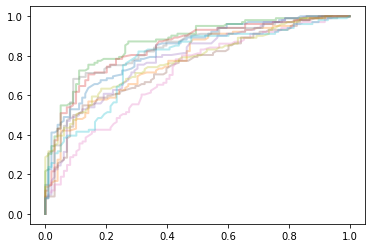

In [15]:
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state, n_estimators = 300) #initiate random forest classifier
cv = StratifiedKFold(n_splits=10,shuffle=False) #initiate k-fold cross validation object

feeling = {'pos': 1,'neg': 0}
df['newfeeling'] = [feeling[item] for item in df.sentiment]

aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
x = pd.DataFrame(trainDataVecs)
y = df['newfeeling']

for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test]) #fitting random forest classifier on 
    #this particular training fold and get the probabilities for test fold
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1]) #get false positive rate, true positive rate and thresholds
    roc_auc = auc(fpr, tpr) #get auc for this particular fold
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
print(np.mean(aucs)) #earier 0.79 